# Telecom Churn Case Study

#### Prepared by: Nikhilkumar Patel & R, Devika
#### Group Id: 87078


### Aim
* To reduce the customer churn for the high profitable customers
* To identify the feature that contribute to the churn

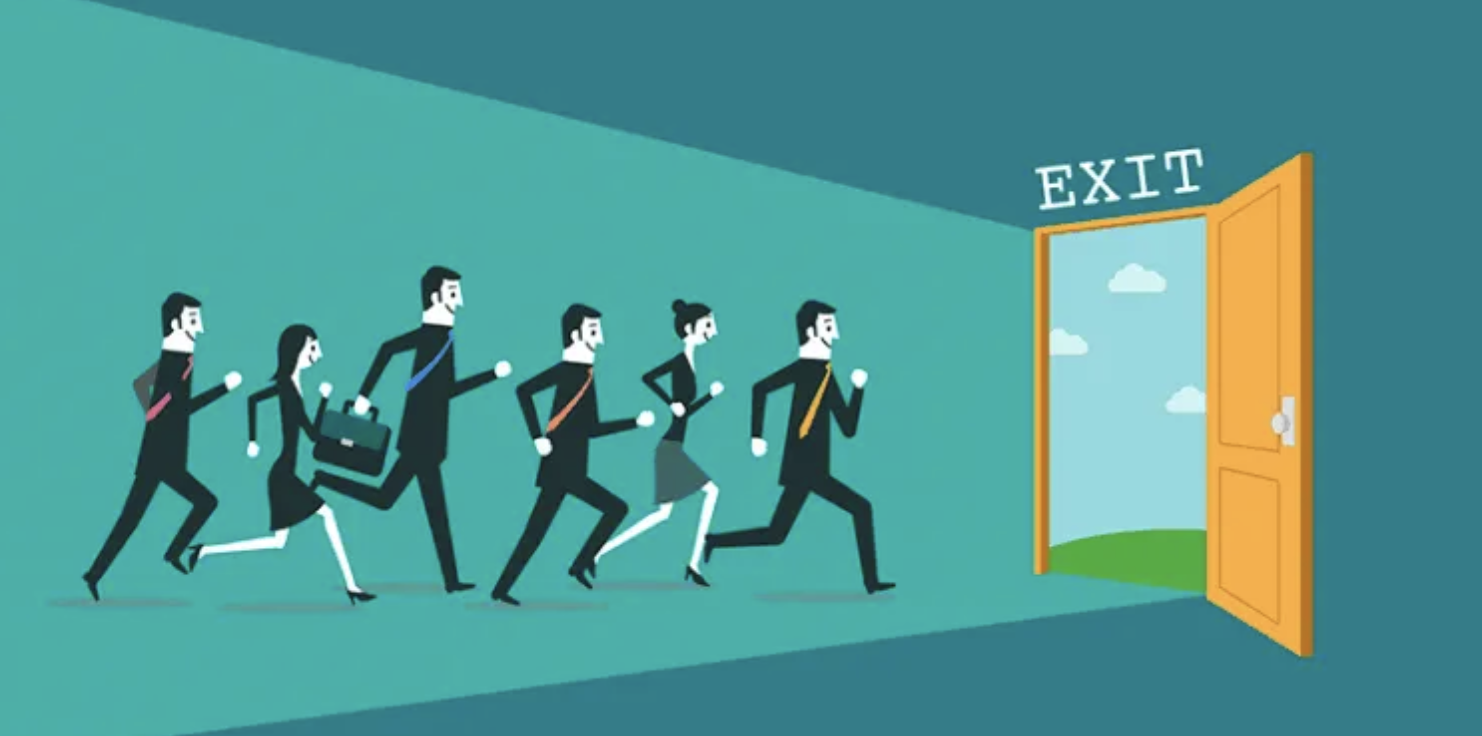

## How to approach the problem?
* EDA (Data Preparation)
* PCA
* Creating the different models and compare their results

In [171]:
import pandas as pd
import numpy as np
import warnings

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.express as px
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import scale
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import recall_score,precision_score,roc_auc_score,f1_score,accuracy_score,confusion_matrix


from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('telecom_churn_data.csv')

In [3]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## 2. Data Preparation

### 2.1 Deriving New Features

In [4]:
# Let us first extract list of columns containing recharge amount
df_rechamt_columns =  df.columns[df.columns.str.contains('rech_amt|rech_data')]
print(df_rechamt_columns)

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')


In [5]:
### Checking for Missing Values for the recharge amount columns
df_rechamt_columns.isnull().sum()

0

In [6]:
100*df.loc[:,df_rechamt_columns].isnull().sum()/len(df)

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

A couple of recharge amount columns contain about 75% missing values, hence replacing the null values with 0... 

In [7]:
df['total_rech_data_6'] = df['total_rech_data_6'].replace(np.NaN,0.0)
df['total_rech_data_7'] = df['total_rech_data_7'].replace(np.NaN,0.0)
df['total_rech_data_8'] = df['total_rech_data_8'].replace(np.NaN,0.0)
df['av_rech_amt_data_6'] = df['av_rech_amt_data_6'].replace(np.NaN,0.0)
df['av_rech_amt_data_7'] = df['av_rech_amt_data_7'].replace(np.NaN,0.0)
df['av_rech_amt_data_8'] = df['av_rech_amt_data_8'].replace(np.NaN,0.0)

Deriving a new feature Total Recharge Amount for Data using total_rech_data and av_rech_amt_data to account for the total amount spent by the customer for data alone.

In [8]:
df['total_rech_amt_data_6'] = df.av_rech_amt_data_6 * df.total_rech_data_6
df['total_rech_amt_data_7'] = df.av_rech_amt_data_7 * df.total_rech_data_7
df['total_rech_amt_data_8'] = df.av_rech_amt_data_8 * df.total_rech_data_8

Deriving another column to compute the average usage of the 1st 2 months as Month 6 and 7 are considered to be the "Good Phase"

In [9]:
df['total_avg_rech_amnt_6_7'] = (df.total_rech_amt_6 + df.total_rech_amt_data_6 \
                                               + df.total_rech_amt_7+ df.total_rech_amt_data_7)/2

In [10]:
df['total_avg_rech_amnt_6_7'].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: total_avg_rech_amnt_6_7, dtype: float64

### 2.2 Defining High Value Customers

High-value customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [11]:
percentile_70th = df.total_avg_rech_amnt_6_7.quantile(0.7)

In [12]:
print(f"70th Percentile of the total averge rech amount for the 1st 2 months is {percentile_70th}")

70th Percentile of the total averge rech amount for the 1st 2 months is 478.0


In [13]:
df_high_value_custs = df[df.total_avg_rech_amnt_6_7 > percentile_70th]
df_high_value_custs.shape

(29953, 230)

### Inference
* After filtering only the customers who fall beyond the 70th percentile, we then calculated the shape of the datase, we got 29953 customers who are grouped as high value customers

### 2.4 Defining the Target Variable "Churn"

Based on the problem desctiption, we will tag churners and remove attributes of the churn phase

The churned customers will be tagged as churn=1, else 0 based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we will use to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [14]:
## checking for NA values in the above columns

churn_col = df_high_value_custs[['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']]

In [15]:
churn_col.isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

No missing values present in the above 4 columns

__Creating the column Churn and initially setting all values to 0__

In [16]:
df_high_value_custs['churn'] = 0

Working on the 4 columns, if customer has not used any service, they will be tagged as 1

In [17]:
def churn_detect(df_high_value_custs):
    if((df_high_value_custs['total_ic_mou_9'] == 0.0) & (df_high_value_custs['total_og_mou_9'] == 0.0)
      & (df_high_value_custs['vol_2g_mb_9'] == 0.0) & (df_high_value_custs['vol_3g_mb_9'] == 0.0)):
        return 1
    else:
        return 0

# Applying User defined Churn detection function HV_Cust_df and creating new column Churn    
df_high_value_custs['Churn'] = df_high_value_custs.apply(churn_detect, axis=1)

In [18]:
df_high_value_custs['Churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: Churn, dtype: int64

In [19]:
var_churned_customer = 100*df_high_value_custs.Churn.sum()/len(df_high_value_custs)
print(f"% of churned customer: {round(var_churned_customer,2)}%")

% of churned customer: 8.12%


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

Percentage Distribution of Churn vs Not-Churned Customers

0    91.877274
1     8.122726
Name: Churn, dtype: float64


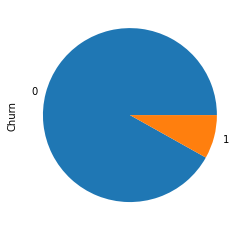

In [20]:
# lets look at the churn/non churn percentage
print((df_high_value_custs['Churn'].value_counts()/len(df_high_value_custs))*100)
((df_high_value_custs['Churn'].value_counts()/len(df_high_value_custs))*100).plot(kind="pie")
plt.show()

In [21]:
df_high_value_custs.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'total_avg_rech_amnt_6_7', 'churn', 'Churn'],
      dtype='object', length=232)

In [22]:
month9_columns =  df_high_value_custs.columns[df_high_value_custs.columns.str.contains('_9')]

In [23]:
# Drop all columns corresponding to the churn phase
df_high_value_custs.drop(month9_columns,axis=1,inplace=True)

In [24]:
## Get the potential categorical data with unique values
unique_col_1=[]

for item in df_high_value_custs:
    if df_high_value_custs[item].nunique() == 1:
        unique_col_1.append(item)

print(f"Catagorical Data with value=1: {unique_col_1}")
df_high_value_custs.drop(unique_col_1, axis=1, inplace=True)

Catagorical Data with value=1: ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'churn']


#### There are unique values in the categorical data but they have only one value, hence do not convey any message therefore, good idea to drop it.

In [25]:
df_high_value_custs.shape

(29953, 164)

In [26]:
## Converting the object to date & time columns
date_col = df_high_value_custs.select_dtypes(include=['object'])
print(f"Colums with datetime format but are objects: {date_col.columns}")

for item in date_col.columns:
    df_high_value_custs[item] = pd.to_datetime(df_high_value_custs[item])

Colums with datetime format but are objects: Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')


In [27]:
df_high_value_custs.head(5)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7,Churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0


## EDA

#### Conducting the Exploratory Data Analysis for various columns to get if the feature contribute to the business insight

<AxesSubplot:xlabel='Churn', ylabel='total_rech_amt_8'>

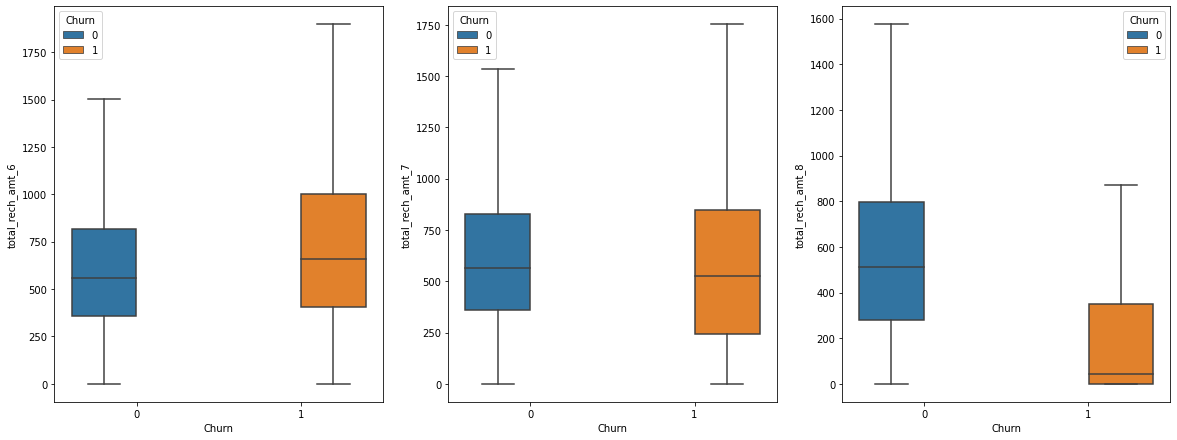

In [28]:
    ## Get the box plot for total_rech_amt for 6,7,8 month (Good Phase)
    plt.figure(figsize=(20,16))
    df = df_high_value_custs
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y="total_rech_amt_6",x="Churn",hue="Churn",
                showfliers=False)
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y="total_rech_amt_7",x="Churn",hue="Churn",
                showfliers=False)
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y="total_rech_amt_8",x="Churn",hue="Churn",
                showfliers=False)

### Inference
* There is drop in the total recharge amount in the 8th month

<AxesSubplot:xlabel='Churn', ylabel='total_rech_amt_data_8'>

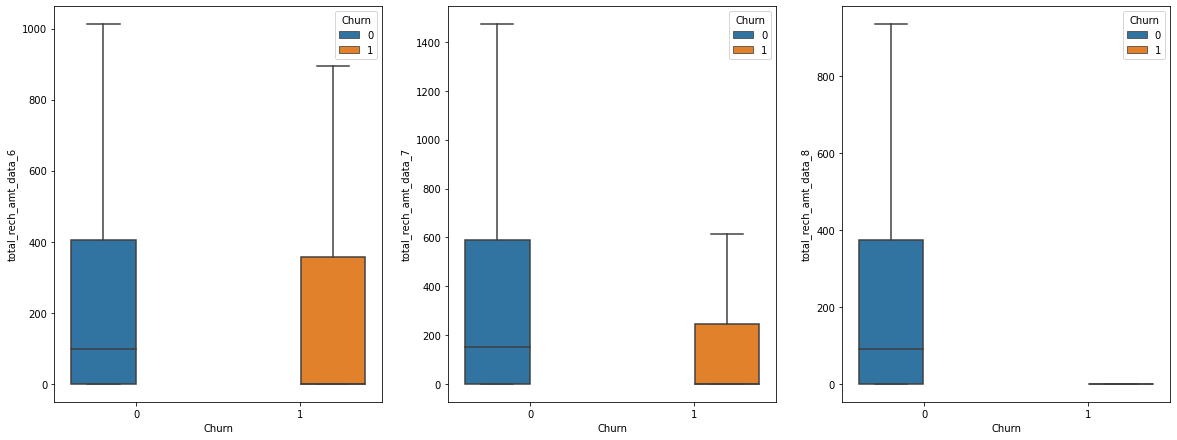

In [29]:
#total recharge amount for data

plt.figure(figsize=(20,16))
df = df_high_value_custs
plt.subplot(2,3,1)
sns.boxplot(data=df, y="total_rech_amt_data_6",x="Churn",hue="Churn",
                showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=df, y="total_rech_amt_data_7",x="Churn",hue="Churn",
                showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=df, y="total_rech_amt_data_8",x="Churn",hue="Churn",
                showfliers=False)

### Inference
* There is again a huge drop in the total recharge amount for data in 8th Month

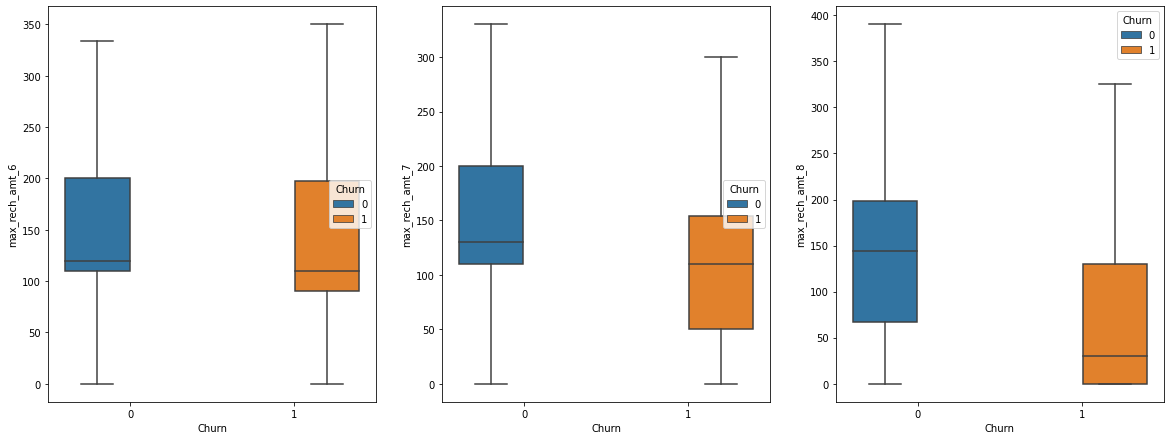

In [30]:
## Plotting the maximum recharge amount for data
plt.figure(figsize=(20,16))
df = df_high_value_custs
plt.subplot(2,3,1)
sns.boxplot(data=df, y="max_rech_amt_6",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=df, y="max_rech_amt_7",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=df, y="max_rech_amt_8",x="Churn",hue="Churn",
            showfliers=False)
plt.show()

### Inference
* There is a drop in the maximum recharge amount of the data in 8th month (action phase) for churned customer

In [31]:
other_recharge = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [32]:
other_recharge

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [33]:
# lets check the % of NA values for other recharge related variables
100*df_high_value_custs.loc[:,other_recharge].isnull().sum()/len(df_high_value_custs)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.112443
max_rech_data_7     43.117551
max_rech_data_8     46.799987
dtype: float64

In [34]:
df_high_value_custs.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


### Inference
* Minumum Value = 1, Maximum Value = 1555 across months
* Indicates there are no recharge in the month
* Therefore, filling it with 0 - indicating there is no recharge

In [35]:
df_high_value_custs.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] \
= df_high_value_custs.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

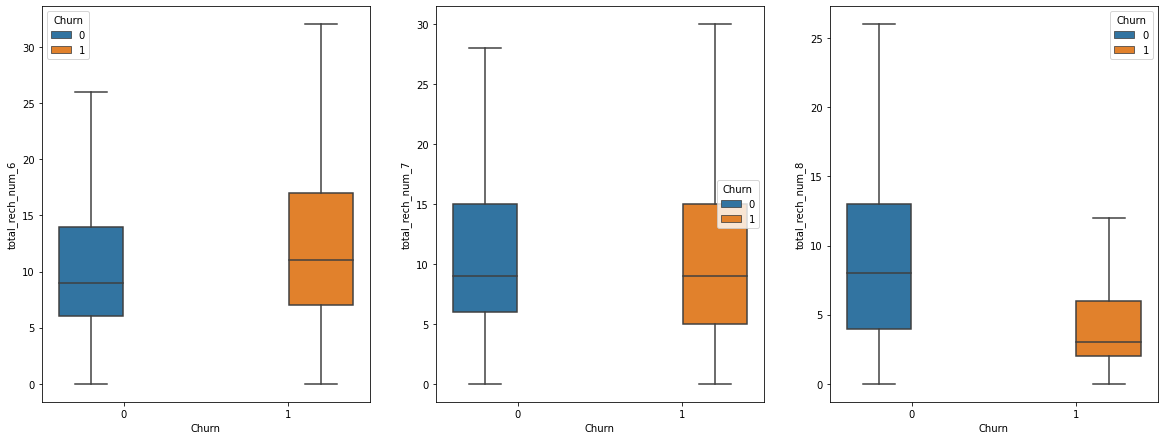

In [36]:
## Plotting the subplots for total_rech_num
plt.figure(figsize=(20,16))
df = df_high_value_custs
plt.subplot(2,3,1)
sns.boxplot(data=df, y="total_rech_num_6",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=df, y="total_rech_num_7",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=df, y="total_rech_num_8",x="Churn",hue="Churn",
            showfliers=False)
plt.show()

### Inference
* Drop in total recharge number in 8th month

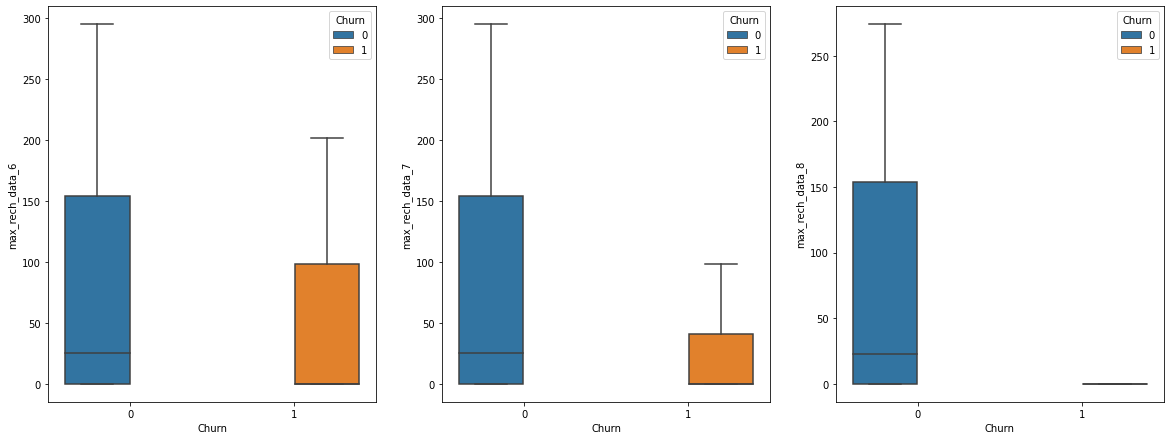

In [37]:
plt.figure(figsize=(20,16))
df = df_high_value_custs
plt.subplot(2,3,1)
sns.boxplot(data=df, y="max_rech_data_6",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=df, y="max_rech_data_7",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=df, y="max_rech_data_8",x="Churn",hue="Churn",
            showfliers=False)
plt.show()

### Inference
* Drop in maximum recharge for data in 8th month

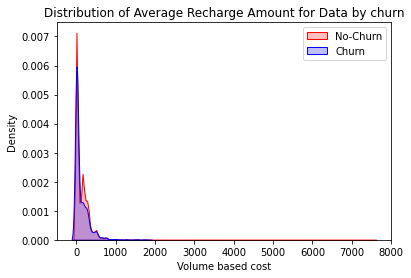

In [38]:
# churn vs max rechare amount for 6th Month
ax = sns.kdeplot(df_high_value_custs.av_rech_amt_data_6[(df_high_value_custs["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value_custs.av_rech_amt_data_6[(df_high_value_custs["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

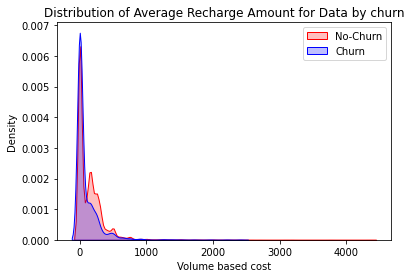

In [39]:
# churn vs max rechare amount for 7th Month
ax = sns.kdeplot(df_high_value_custs.av_rech_amt_data_7[(df_high_value_custs["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value_custs.av_rech_amt_data_7[(df_high_value_custs["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

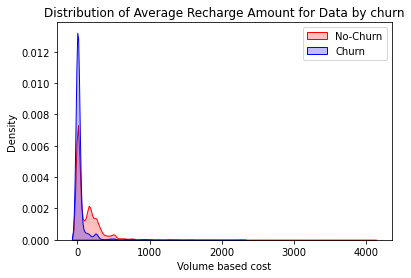

In [40]:
# churn vs max rechare amount for 8th Month
ax = sns.kdeplot(df_high_value_custs.av_rech_amt_data_8[(df_high_value_custs["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df_high_value_custs.av_rech_amt_data_8[(df_high_value_custs["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

#### Inference 
* Avergae recharge amount for data has reduced for the month of 8

In [41]:
# Creating categories for month 8 column totalrecharge count
df_high_value_custs['total_rech_num_group_8']=pd.cut(df_high_value_custs['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

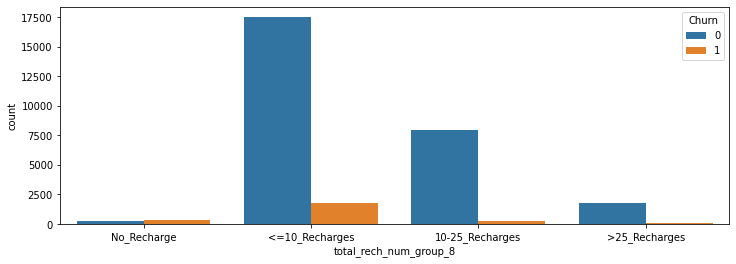

In [42]:
plt.figure(figsize=[12,4])
sns.countplot(data=df_high_value_custs,x="total_rech_num_group_8",hue="Churn")
plt.show()

#### Inference
* Evidentally, the no of recharges done by the churn customers has descended for the 8th month

In [43]:
## Finding usage based churn variables
list_2g_3g = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('2g|3g',regex=True)]

In [44]:
percentage_3g_2g_null_check = 100*df_high_value_custs.loc[:,list_2g_3g].isnull().sum()/len(df_high_value_custs.loc[:,list_2g_3g])
df = pd.DataFrame(percentage_3g_2g_null_check)


In [45]:
df

,0
count_rech_2g_6,44.112443
count_rech_2g_7,43.117551
count_rech_2g_8,46.799987
count_rech_3g_6,44.112443
count_rech_3g_7,43.117551
count_rech_3g_8,46.799987
vol_2g_mb_6,0.000000
vol_2g_mb_7,0.000000
vol_2g_mb_8,0.000000
vol_3g_mb_6,0.000000


### Inference
* 40-45% of the values are not available for count_rech_* & arpu field
* These coloums can be dropped

In [46]:
# let's check Volume based cost 
vbc_column = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [47]:
# Renaming month named vbc columns to 6,7,8,9 format
df_high_value_custs.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
df_high_value_custs.drop('vbc_3g_9',axis=1,inplace=True)

In [48]:
vbc_column = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [49]:
df_high_value_custs.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

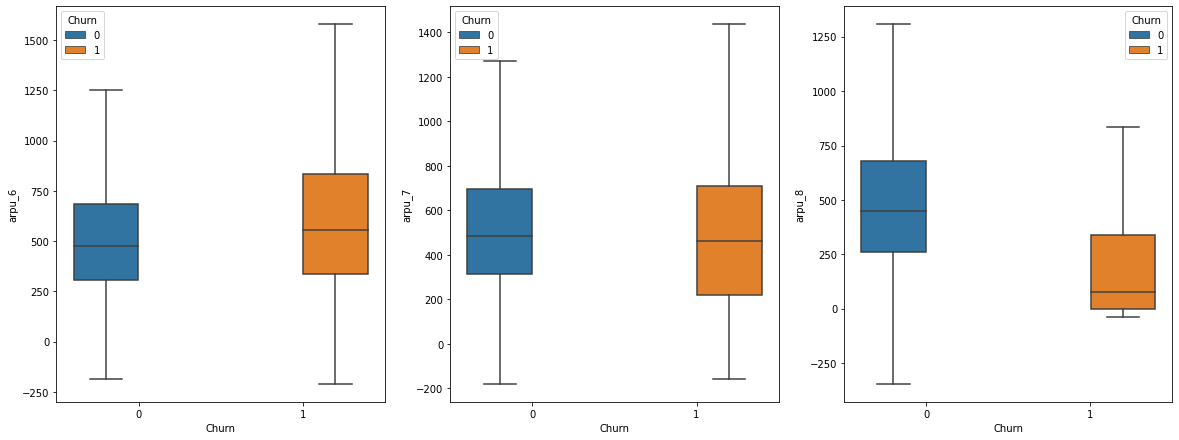

In [50]:
# Checking columns for average revenue per user
plt.figure(figsize=(20,16))
df = df_high_value_custs
plt.subplot(2,3,1)
sns.boxplot(data=df, y="arpu_6",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,2)
sns.boxplot(data=df, y="arpu_7",x="Churn",hue="Churn",
            showfliers=False)
plt.subplot(2,3,3)
sns.boxplot(data=df, y="arpu_8",x="Churn",hue="Churn",
            showfliers=False)
plt.show()

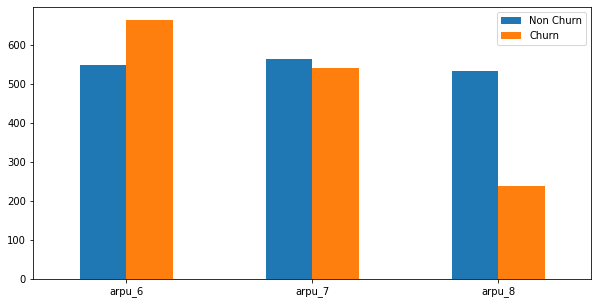

           arpu_6  arpu_7  arpu_8
Non Churn  549.55  562.93  532.87
Churn      663.71  541.15  237.66


In [51]:
arpu_vars = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('arpu_')]

df_0 = df_high_value_custs[df_high_value_custs.Churn==0].filter(arpu_vars)
df_1 = df_high_value_custs[df_high_value_custs.Churn==1].filter(arpu_vars)

mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

frames = [mean_df_0, mean_df_1]
mean_bar = pd.concat(frames)

mean_bar.T.plot.bar(figsize=(10,5),rot=0)
plt.show()

print(round(mean_bar,2))
    

### Inference
* Drop in the ARPU in 8th month for churned customers

In [52]:
## Working on MOU (minutes of Usage)

mou_cols = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('mou')]

print(df_high_value_custs[mou_cols].isnull().sum()/len(df_high_value_custs[mou_cols]) * 100)

onnet_mou_6     1.809502
onnet_mou_7     1.789470
onnet_mou_8     3.912797
offnet_mou_6    1.809502
offnet_mou_7    1.789470
                  ...   
spl_ic_mou_7    1.789470
spl_ic_mou_8    3.912797
isd_ic_mou_6    1.809502
isd_ic_mou_7    1.789470
isd_ic_mou_8    3.912797
Length: 81, dtype: float64


In [53]:
# ~ 4% of the data is seen to be having missing values for each MOU variable, therefore replaceing null values by 0 for minutes of usage variables
df_high_value_custs.loc[:,mou_cols] = df_high_value_custs.loc[:,mou_cols].replace(np.NaN,0)

In [54]:
mou_og_cols6 = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('.*_og_.*mou_6',regex=True)]
df_high_value_custs.loc[:,mou_og_cols6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,26.596033,84.574122,163.309546,6.348347,1.577380,254.240239,165.897941,179.439168,1.806292,347.147123,2.174995,5.825077,610.058005
std,116.274169,228.962993,250.218928,22.139546,6.308138,378.546516,403.990737,409.143255,11.988810,608.845412,45.888834,17.579228,691.178402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.380000,19.210000,0.000000,0.000000,32.260000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,116.640000
50%,0.000000,24.360000,77.260000,0.000000,0.000000,124.590000,2.710000,16.360000,0.000000,45.080000,0.000000,0.230000,410.630000
75%,0.000000,78.060000,209.030000,4.230000,0.000000,332.310000,109.560000,154.540000,0.000000,465.290000,0.000000,5.210000,859.030000
max,3775.110000,6431.330000,4729.740000,1466.030000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


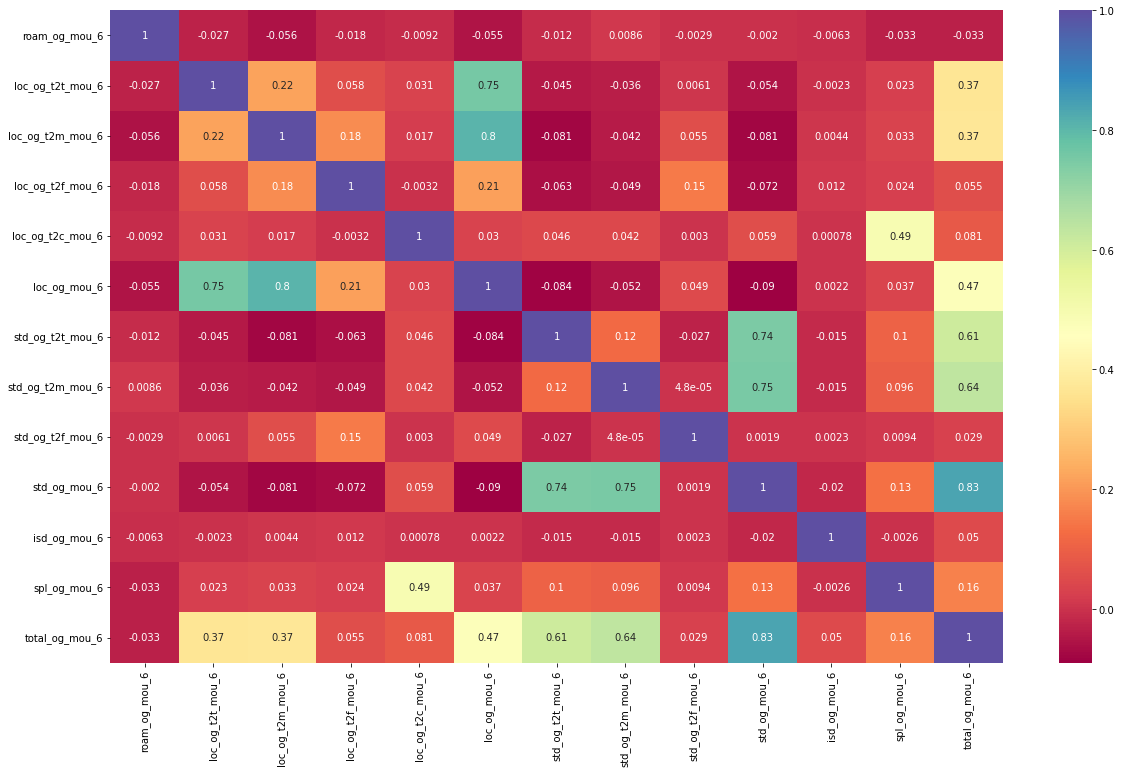

In [55]:
## Checking the co-linearity between the variable for 6th month on MOU
plt.figure(figsize=(20,12))
sns.heatmap(df_high_value_custs.filter(mou_og_cols6).corr(),cmap="Spectral",annot=True)
plt.show()
    


In [56]:
list_total_og_cols = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
df_high_value_custs.drop(list_total_og_cols,axis=1,inplace=True)
print(f"Dropping the below Columns as show from heatmap that they have multi co-linearity and exhibit the summation of other columns: \n {list_total_og_cols.tolist()}")

Dropping the below Columns as show from heatmap that they have multi co-linearity and exhibit the summation of other columns: 
 ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']


In [57]:
## Incoming MOU
mou_ic_cols6 = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [58]:
df_high_value_custs.loc[:,mou_ic_cols6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000
mean,16.124001,65.508916,150.474219,15.291721,231.284489,14.896832,29.212448,2.698829,46.811695,290.121569,0.061047,10.800999
std,76.344227,163.855393,219.321437,45.785255,315.005426,77.750215,98.279300,19.114766,137.597749,365.739944,0.188124,76.789627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.100000,28.090000,0.000000,47.910000,0.000000,0.000000,0.000000,1.030000,72.890000,0.000000,0.000000
50%,0.000000,25.080000,84.110000,1.840000,134.560000,0.380000,5.000000,0.000000,11.410000,183.780000,0.000000,0.000000
75%,0.000000,67.480000,188.740000,11.980000,297.260000,8.190000,23.630000,0.110000,41.490000,372.160000,0.000000,0.000000
max,2613.310000,6351.440000,4693.860000,1678.410000,7454.630000,5459.560000,4630.230000,1351.110000,5459.630000,7716.140000,19.760000,6789.410000


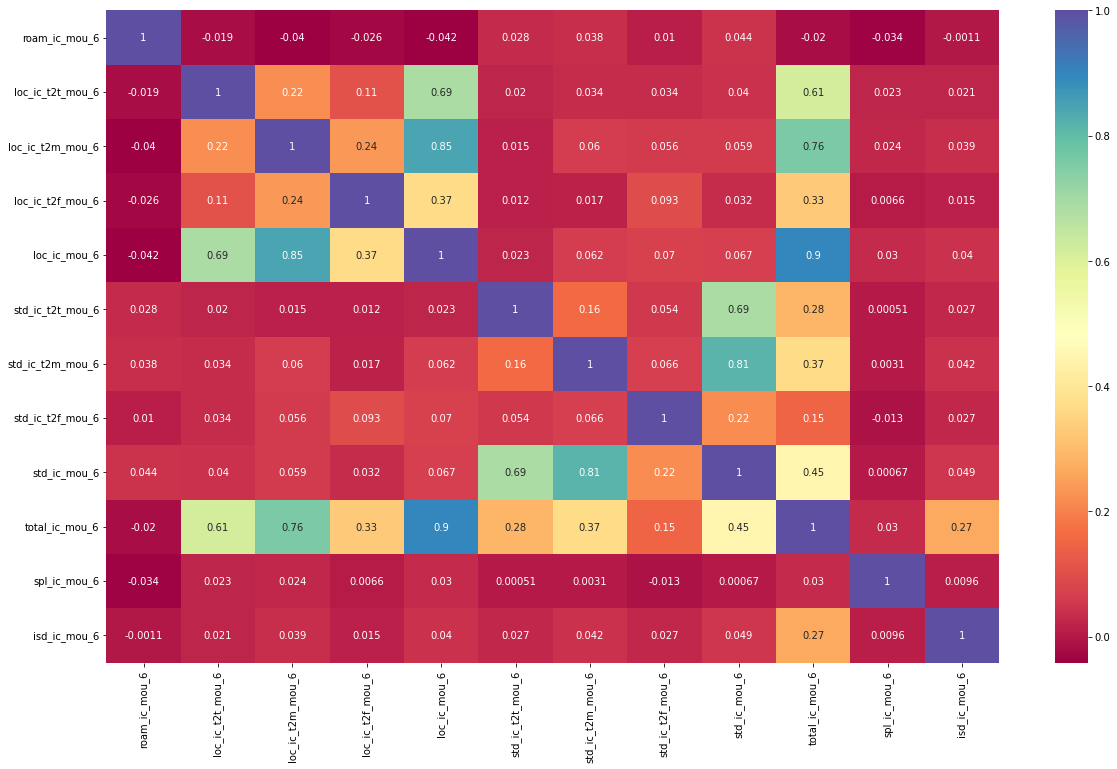

In [59]:
plt.figure(figsize=(20,12))
sns.heatmap(df_high_value_custs.filter(mou_ic_cols6).corr(),cmap="Spectral",annot=True)
plt.show()

In [60]:
list_total_ic_cols = df_high_value_custs.columns[df_high_value_custs.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
df_high_value_custs.drop(list_total_ic_cols,axis=1,inplace=True)
print("Dropping the columns due to multi-collinearity & it exhibits the summation of different columns in total,std,loc for 6,7,8 months: ")
list_total_ic_cols.tolist()

Dropping the columns due to multi-collinearity & it exhibits the summation of different columns in total,std,loc for 6,7,8 months: 


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

### Checking the loyalty of the customer with the network operator for 5 years window

In [61]:
tenure_data = df_high_value_custs.copy()

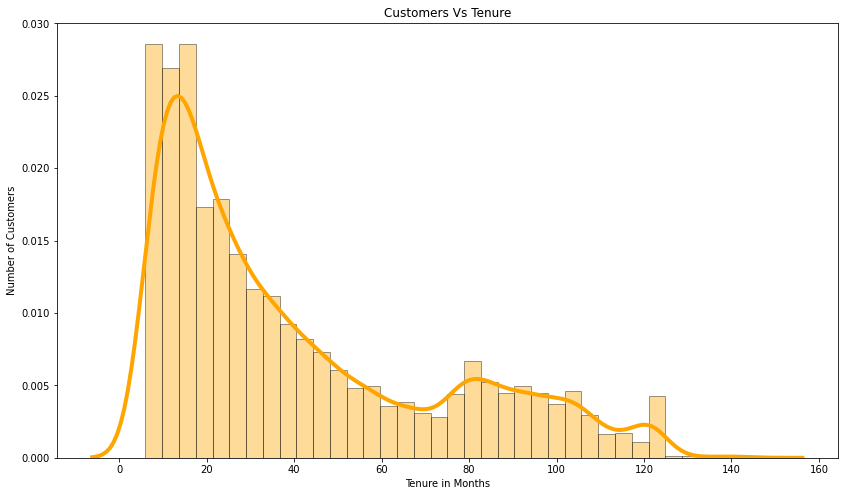

In [62]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [63]:
#deriving a new variable Tenure

df_high_value_custs['tenure'] = (df_high_value_custs['aon']/30).round(0)

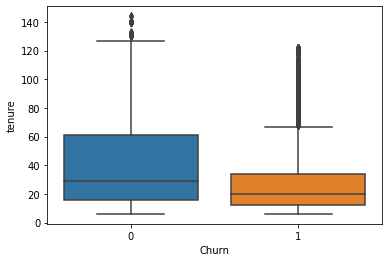

In [64]:
sns.boxplot(x = df_high_value_custs.Churn, y = df_high_value_custs.tenure)

plt.show()

In [65]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)

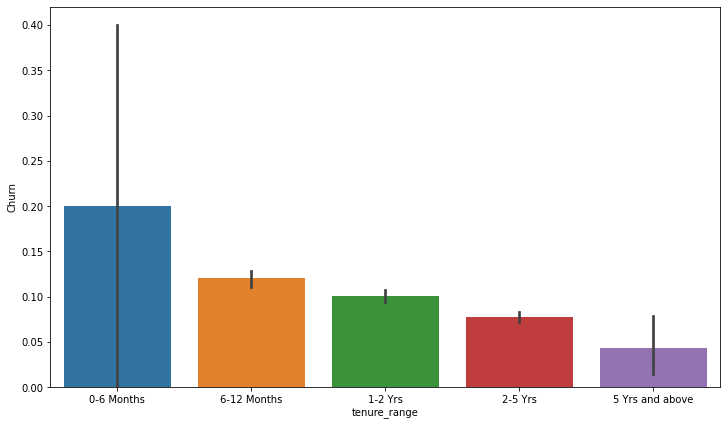

In [66]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='Churn', data=tenure_data)
plt.show()

### Inferece
* From the above plots , its clear that tenured customers are more loyal, do no churn and they continue using the same telecom operator

In [67]:
### Fetching the null values which are more than 40% 

null_percentage_metadata = df_high_value_custs.isnull().sum()/len(df_high_value_custs) * 100
null_percentage_metadata = null_percentage_metadata[null_percentage_metadata > 40]
null_percentage_metadata


date_of_last_rech_data_6    44.112443
date_of_last_rech_data_7    43.117551
date_of_last_rech_data_8    46.799987
night_pck_user_6            44.112443
night_pck_user_7            43.117551
night_pck_user_8            46.799987
fb_user_6                   44.112443
fb_user_7                   43.117551
fb_user_8                   46.799987
dtype: float64

In [68]:
is_more_40 = null_percentage_metadata.index
df_high_value_custs.drop(df_high_value_custs[is_more_40],axis=1,inplace=True)

In [69]:
df_high_value_custs.shape

(29953, 126)

### Looking at a few columns having null values

In [70]:
### Fetching the null values which are more than 0% 

null_percentage_metadata = df_high_value_custs.isnull().sum()/len(df_high_value_custs) * 100
null_percentage_metadata = null_percentage_metadata[null_percentage_metadata > 0]
null_percentage_metadata

og_others_6            1.809502
og_others_7            1.789470
og_others_8            3.912797
ic_others_6            1.809502
ic_others_7            1.789470
ic_others_8            3.912797
date_of_last_rech_6    0.243715
date_of_last_rech_7    0.327179
date_of_last_rech_8    1.943044
dtype: float64

In [71]:
### Replacing the nan values in the above numeric columns excluding the date columns
df_high_value_custs['og_others_8'] = df_high_value_custs['og_others_8'].replace(np.NaN,0.0)
df_high_value_custs['ic_others_8'] = df_high_value_custs['ic_others_8'].replace(np.NaN,0.0)
df_high_value_custs['og_others_6'] = df_high_value_custs['og_others_6'].replace(np.NaN,0.0)
df_high_value_custs['ic_others_6'] = df_high_value_custs['ic_others_6'].replace(np.NaN,0.0)
df_high_value_custs['og_others_7'] = df_high_value_custs['og_others_7'].replace(np.NaN,0.0)
df_high_value_custs['ic_others_7'] = df_high_value_custs['ic_others_7'].replace(np.NaN,0.0)

In [72]:
df_high_value_custs.shape

(29953, 126)

### Merging the data related to column 6 and 7

In [73]:
df_final = df_high_value_custs.copy()

In [74]:
#dropping a column we created initially - total_avg_rech_amnt_6_7
df_final.drop(["total_avg_rech_amnt_6_7"],axis=1,inplace=True)

In [75]:
#dropping all the date column
df_final.drop(df_final.filter(regex='date_').columns,axis=1,inplace=True)

In [76]:
#dropping all the tenure related columns
df_final.drop(["tenure"],axis=1,inplace=True)

In [77]:
# dropping all the total recharge count columns
df_final.drop(["total_rech_num_group_8"],axis=1,inplace=True)

__The average of all features per user in good phase of customer is given by merging the values for month 6 and month 7. Since we have two seperate averages, lets take an average to these two months and drop the other columns.__

In [78]:
col_list = df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [79]:
coln_list = df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(coln_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [80]:
col_list_to_drop = df_final.filter(regex='_6|_7')
df_final.drop(col_list_to_drop,axis=1,inplace=True)

In [81]:
df_final.drop(["mobile_number"],axis=1,inplace=True)

In [82]:
df_final.shape

(29953, 80)

By merging many columns, the total number of columns has reduced.

## Modelling

### PCA - Principal Component Analysis on the data

#### Note - 
- While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data

In [132]:
df_telcom_pca2 = df_final.copy()

In [133]:
df_telcom_pca2.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,...,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,...,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930,356.0


#### Scaling the data with StandardScaler

In [134]:
Y = df_telcom_pca2["Churn"]
X = df_telcom_pca2.drop(["Churn"],axis=1)

In [135]:
scaler = StandardScaler()
X_col = X.columns
X_scaled = scaler.fit_transform(X)
X_scale_final = pd.DataFrame(X_scaled, columns=X_col)

In [136]:
X_scale_final.shape

(29953, 79)

pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

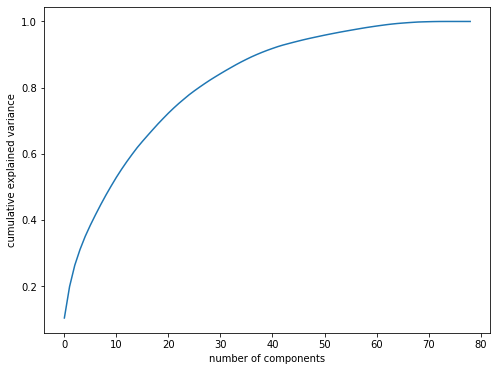

In [137]:
pca = PCA(svd_solver='randomized', random_state=101)
pca.fit(X_scale_final)
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [138]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.34,  19.83,  26.28,  31.01,  34.99,  38.42,  41.6 ,  44.64,
        47.53,  50.26,  52.88,  55.32,  57.61,  59.77,  61.85,  63.73,
        65.53,  67.3 ,  69.04,  70.69,  72.3 ,  73.81,  75.24,  76.57,
        77.88,  79.06,  80.18,  81.26,  82.3 ,  83.28,  84.23,  85.16,
        86.06,  86.95,  87.79,  88.58,  89.34,  90.04,  90.69,  91.3 ,
        91.86,  92.4 ,  92.88,  93.3 ,  93.71,  94.11,  94.5 ,  94.86,
        95.2 ,  95.54,  95.87,  96.18,  96.49,  96.79,  97.07,  97.35,
        97.63,  97.9 ,  98.16,  98.4 ,  98.63,  98.84,  99.05,  99.23,
        99.39,  99.52,  99.64,  99.75,  99.85,  99.9 ,  99.94,  99.98,
       100.  , 100.01, 100.01, 100.01, 100.01, 100.01, 100.01])

In [139]:
col = list(X_scale_final.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.000556,0.294716,0.154905,arpu_8
1,-0.112810,0.114988,0.149637,onnet_mou_8
2,-0.104630,0.199573,0.114285,offnet_mou_8
3,-0.007768,0.050446,0.007028,roam_ic_mou_8
4,-0.022813,0.069574,0.029853,roam_og_mou_8
5,-0.030653,0.098338,0.024347,loc_og_t2t_mou_8
6,-0.031542,0.176698,-0.027159,loc_og_t2m_mou_8
7,0.009128,0.109241,-0.091910,loc_og_t2f_mou_8
8,-0.014519,0.015865,0.079296,loc_og_t2c_mou_8
9,-0.109851,0.069713,0.155442,std_og_t2t_mou_8


#### Conclusion from the PCA
- It is seen that around 90% of information/variance can be shown by opting for 60 components

In [156]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scale_final,Y, train_size=0.7,test_size=0.3,random_state=100)

In [157]:
X_train.shape

(20967, 79)

#### Class Imbalance - SMOTE Analysis

In [158]:
smote = SMOTE(random_state=101)
x_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

#### Pricnipal Component Analysis

In [159]:
# Applying PCA : Pricnipal Component Analysis
pca = IncrementalPCA(n_components=60)    
x_train_pca = pca.fit_transform(x_train_sm) # fit and transform the training dataset
x_test_pca = pca.transform(X_test)   # transform the testing dataset *** 


# x_tr_pca, x_test_pca, y_tr,    y_test
# x_train,  x_test,     y_train, y_test 

## output variables to be used: x_train_pca, x_test_pca, y_train_sm, y_test

In [160]:
#dataset after PCA
x_train.shape

(38430, 60)

## Logistic Regression with PCA

In [162]:
lr = LogisticRegression()
model = lr.fit(x_train_pca,y_train_sm) ## Feeding the PCA data to Logistic Regression Model

#Making prediction on the test data
pred_probs_test = model.predict_proba(x_test)[:,1]

print("Accurancy : "+"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test)))

Accurancy : 0.57


In [161]:
# fit the pca training data
model.fit(x_train_pca, y_train_sm)

# predict the testing pca data
Y_pred = model.predict(x_test_pca)


acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)



# Model evaluation

Accuracy Score :  81.52
ROC AUC score :  82.92
Precision score :  27.02
Recall score :  84.58


## Decision Tree

In [165]:
# initialize the Decision Tree
model = DecisionTreeClassifier(class_weight='balanced', random_state=101)
# fit the pca training data
model.fit(x_train_pca, y_train_sm)
# predict the pca testing data
Y_pred = model.predict(x_test_pca)

# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)




Accuracy Score :  83.63
ROC AUC score :  68.83
Precision score :  23.49
Recall score :  51.4


## RandomForest

In [168]:
# initialize the randomforest
model = RandomForestClassifier(class_weight='balanced', random_state=101)
# fit the pca training data
model.fit(x_train_pca, y_train_sm)
# predict the pca testing data
Y_pred = model.predict(x_test_pca)

# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)

Accuracy Score :  91.99
ROC AUC score :  76.46
Precision score :  47.65
Recall score :  58.15


In [172]:
# Initialize the XGBoost
model = XGBClassifier(random_state=101)
# fit the pca training data
model.fit(x_train_pca, y_train_sm)
# predict the pca testing data
Y_pred = model.predict(x_test_pca)

# Model evaluation
acc_score = round(accuracy_score(y_test, Y_pred)*100,2)
print('Accuracy Score : ',acc_score)

# ROC AUC score
roc_score = round(roc_auc_score(y_test, Y_pred)*100,2)
print('ROC AUC score : ',roc_score)

# Precision score
prec_score = round(precision_score(y_test, Y_pred)*100,2)
print('Precision score : ', prec_score)

# Recall score
rec_score = round(recall_score(y_test, Y_pred)*100,2)
print('Recall score : ', rec_score)

Accuracy Score :  90.84
ROC AUC score :  79.48
Precision score :  43.19
Recall score :  66.08
